In [1]:
## Kevin Wang RJ Lombardi Alex Wan
## Paragraphs are uploaded on CMS

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


In [2]:
hp = pd.read_csv("train.csv")
hp1 = pd.read_csv("train.csv")

In [3]:
pd.set_option('display.max_columns', None)
hp.head()
hp.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [4]:
hp['MasVnrType'] = hp['MasVnrType'].fillna('None')
hp['LotFrontage'] = hp['LotFrontage'].fillna(70.049958)
hp['MasVnrArea'] = hp['MasVnrArea'].fillna(0)
hp['Electrical'] = hp['Electrical'].fillna('SBrkr')
hp = hp.drop('MSSubClass',axis=1)
hp = hp.drop('Id', axis=1)
hp = hp.drop('PoolArea', axis=1)
hp = hp.drop('ScreenPorch',axis=1)
hp = hp.drop('MiscVal',axis=1)
hp = hp.drop('3SsnPorch',axis=1)
hp = hp.drop('EnclosedPorch',axis=1)
hp = hp.drop('Utilities', axis=1)
hp = hp.drop('MSZoning', axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
hp = hp.dropna(axis=1)

enc = LabelEncoder()
for i in hp.columns:
    hp[i] = enc.fit_transform(hp[i])

hp1 = hp

In [6]:
hp = StandardScaler().fit_transform(hp)
# form clusters
hclust = AgglomerativeClustering()
mod = hclust.fit(hp)

In [7]:
# generate clusters
hclust_2 = linkage(hp,'ward')
hclust_3 = linkage(hp,'complete')

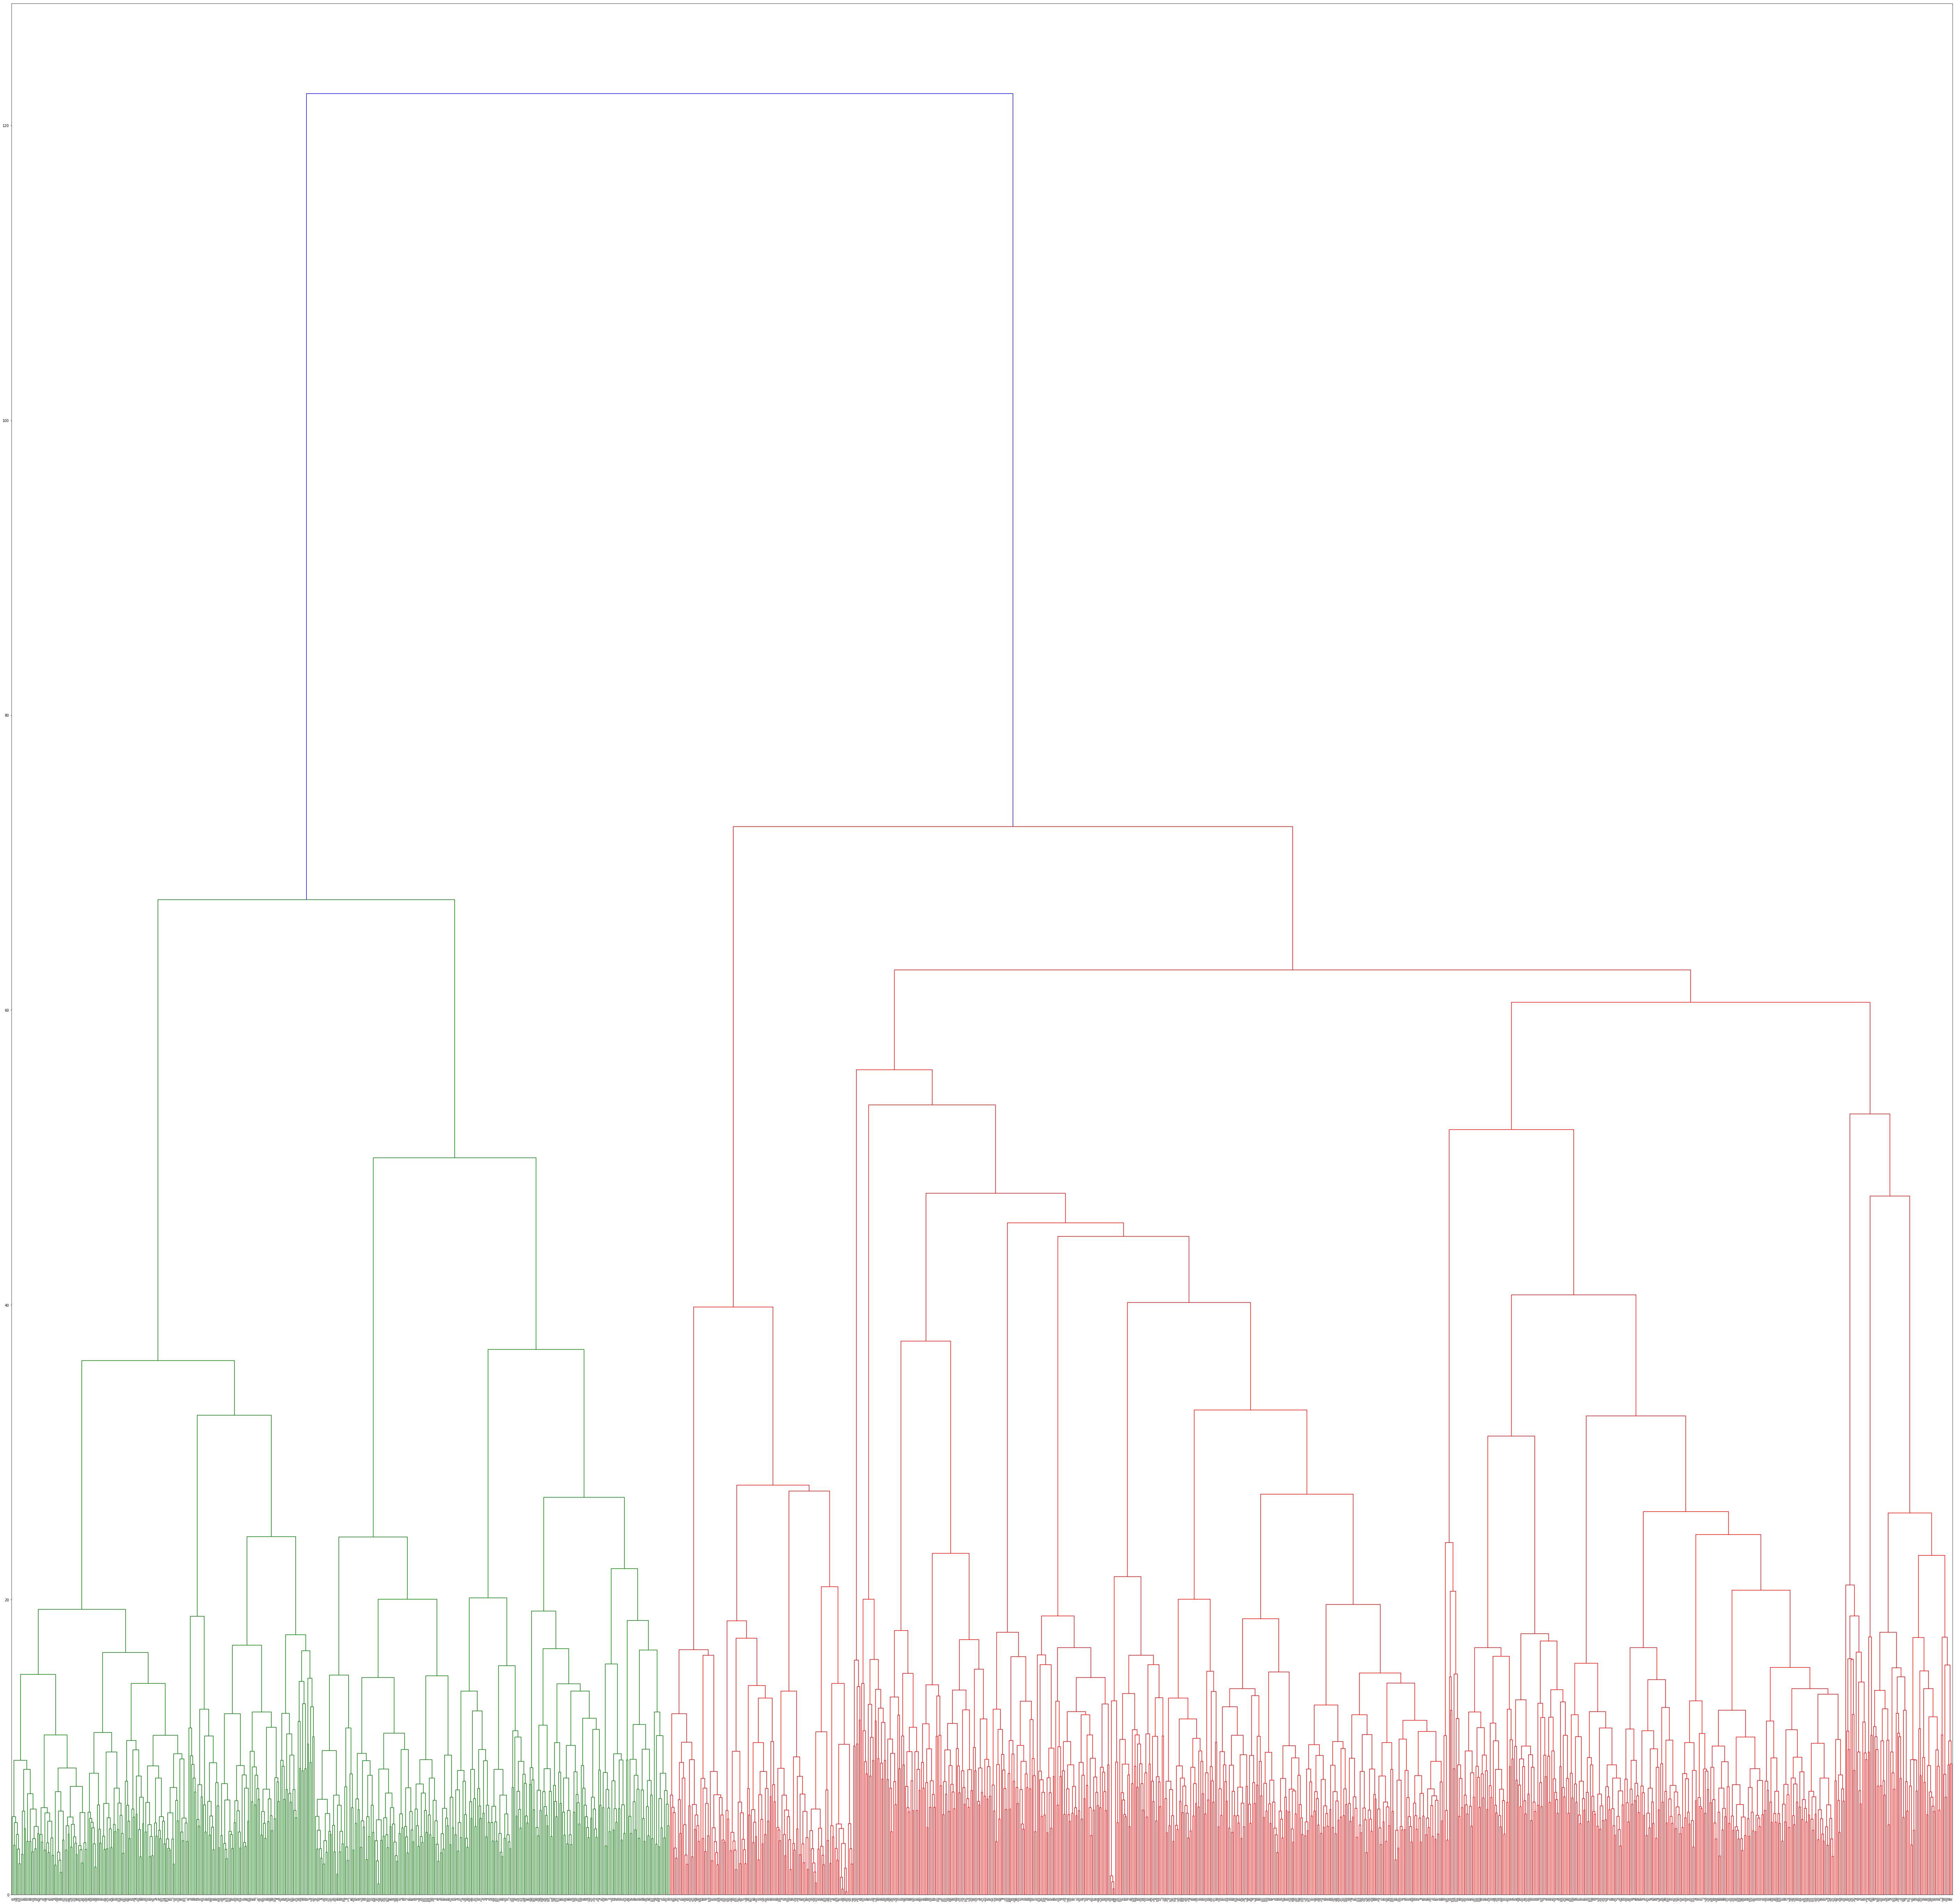

In [8]:
# plot dendrogram
# increases figure size
plt.figure(figsize=(100, 100))
dendrogram(hclust_2)
plt.show()

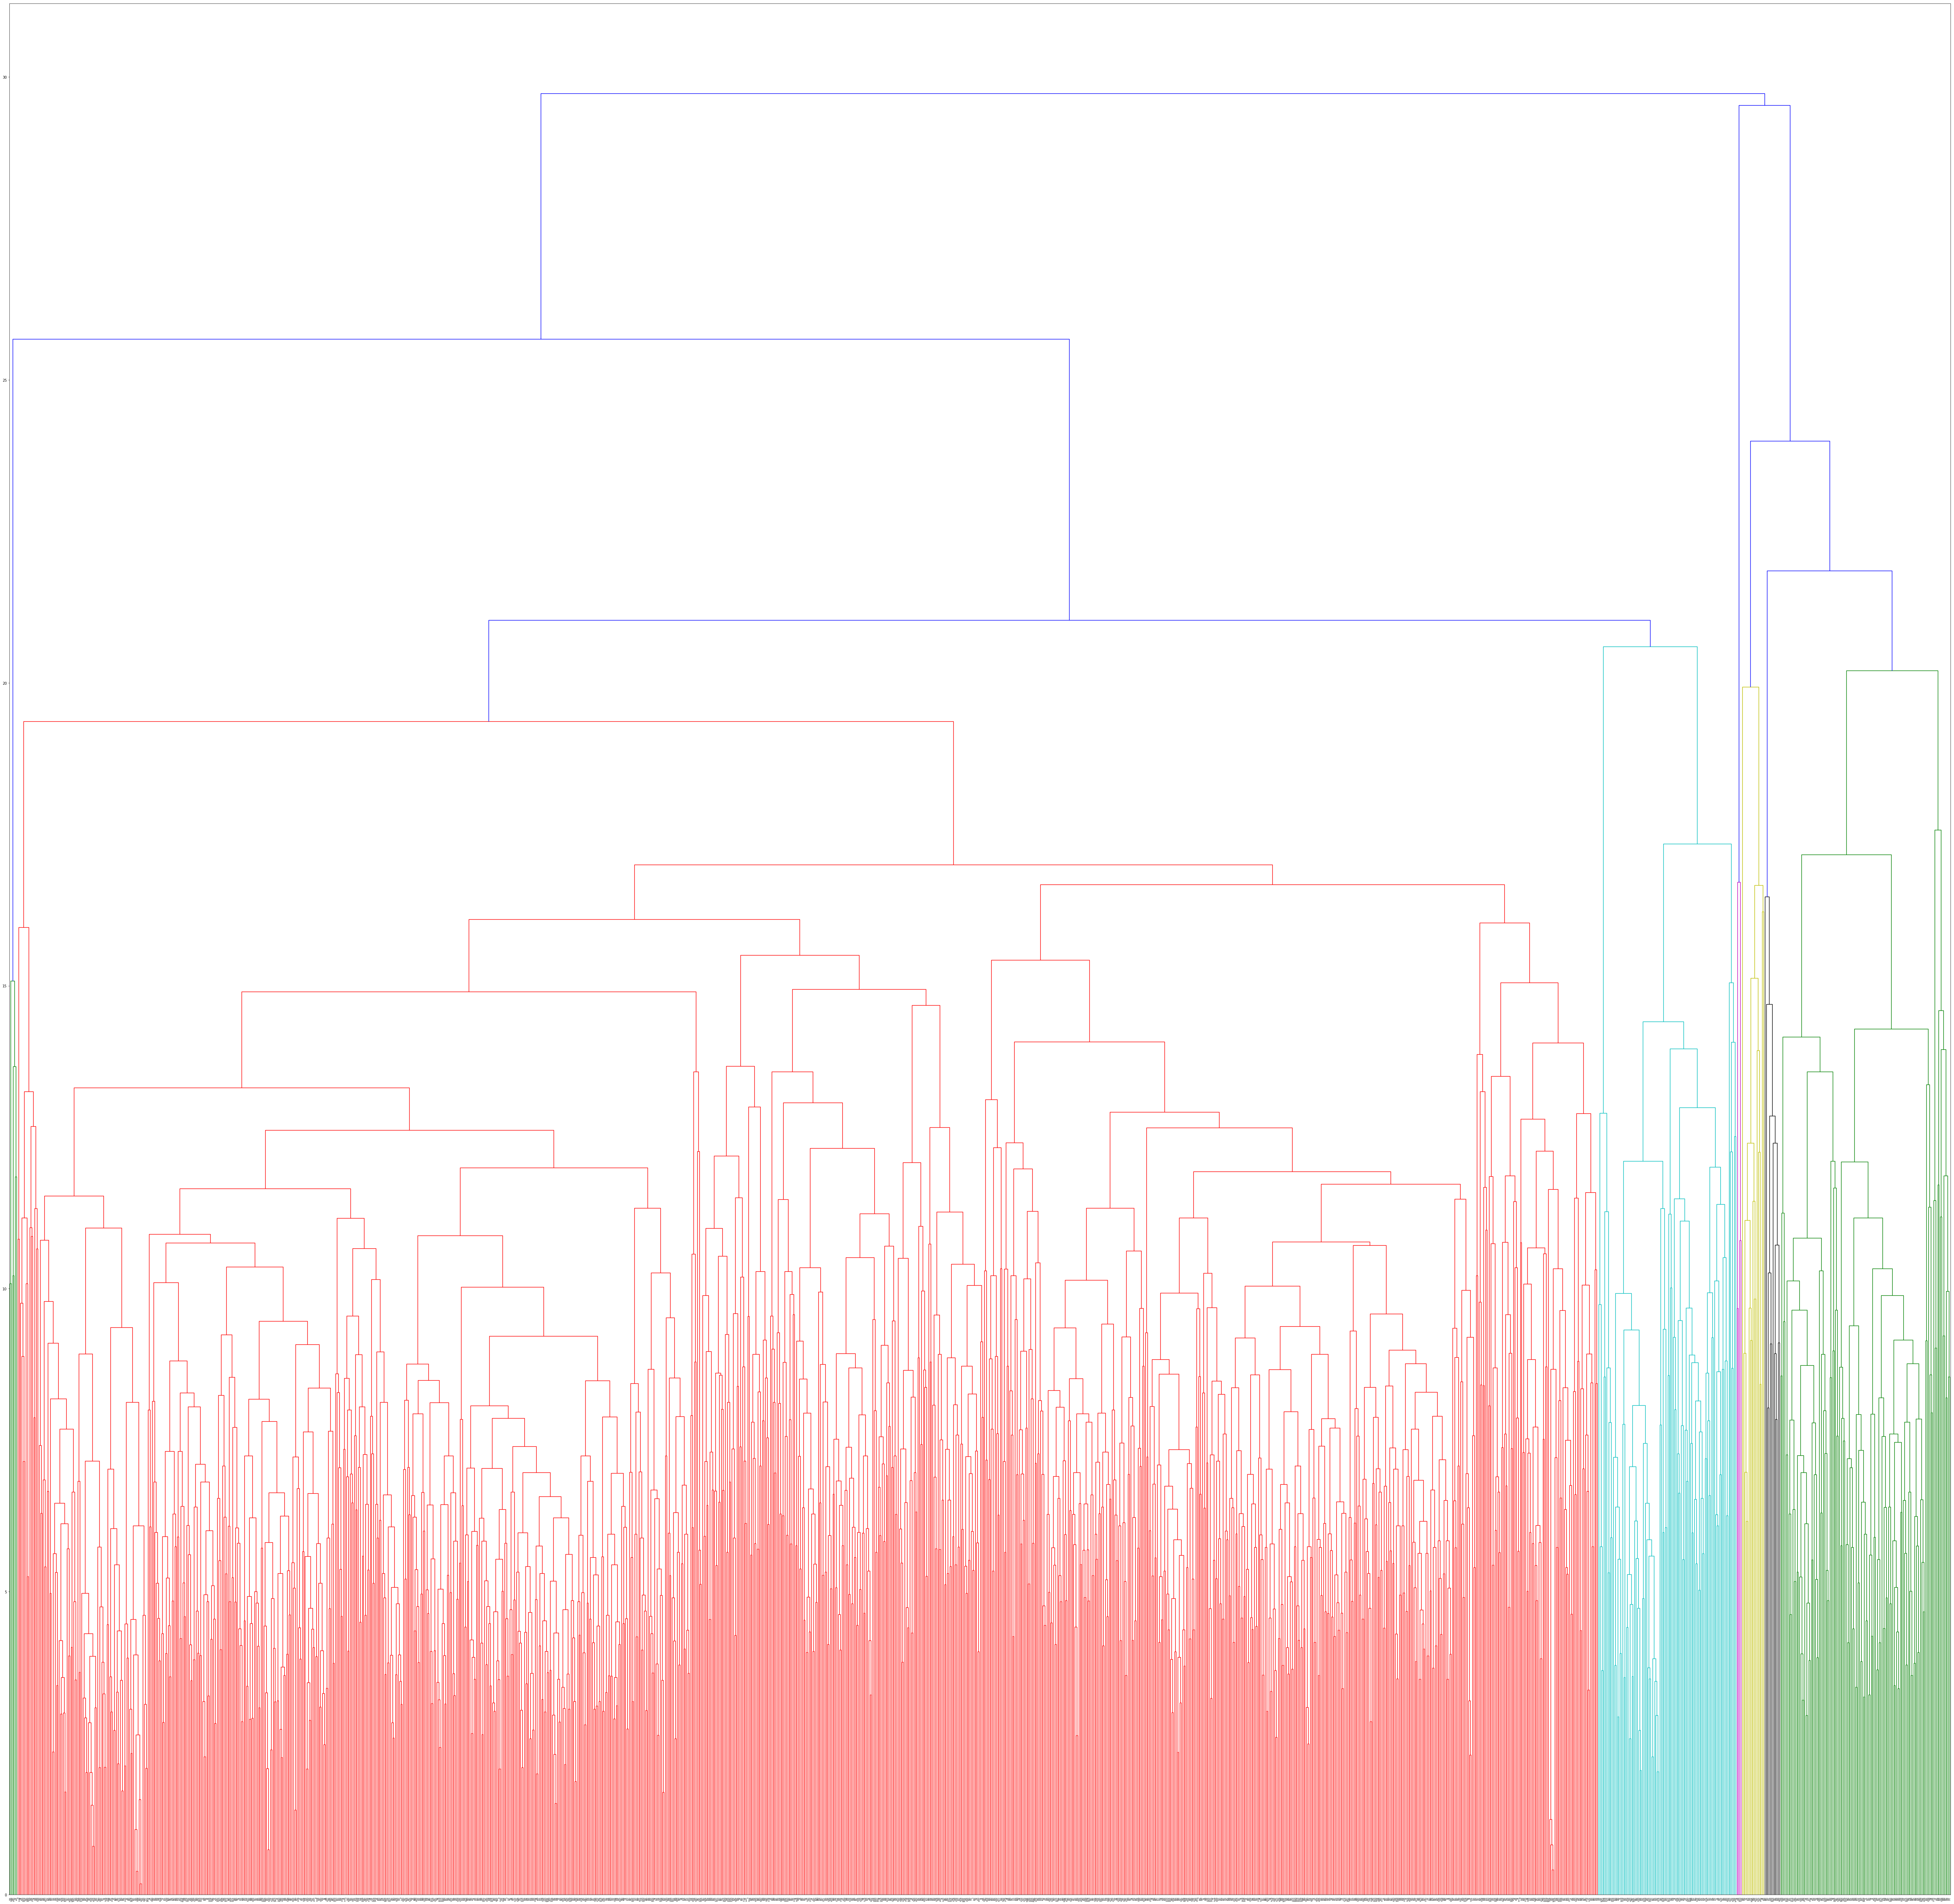

In [9]:
plt.figure(figsize=(100, 100))
dendrogram(hclust_3)
plt.show()

In [18]:
hp1 = hp1.rename(columns={x:y for x,y in zip(hp1.columns,range(0,len(hp1.columns)))})

In [19]:
hp1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56],
           dtype='int64')

In [20]:
hp1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,36,327,1,3,3,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,128,2,4,2,361,0,73,179,1,0,1,4,134,232,0,531,1,0,2,1,3,1,2,6,6,0,2,220,2,0,49,1,2,8,4,412
1,52,498,1,3,3,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,2,0,3,4,1,482,0,167,441,1,0,1,4,427,0,0,259,0,1,2,0,3,1,3,4,6,1,2,149,2,187,0,4,1,8,4,339
2,39,702,1,0,3,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,104,2,4,2,222,0,278,214,1,0,1,4,178,239,0,570,1,0,2,1,3,1,2,4,6,1,2,260,2,0,30,8,2,8,4,442
3,31,489,1,0,3,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,2,0,3,4,0,66,0,346,117,1,2,1,4,208,180,0,536,1,0,1,0,3,1,2,5,6,1,3,284,2,0,24,1,0,8,0,194
4,56,925,1,0,3,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,221,2,4,2,328,0,318,370,1,0,1,4,347,320,0,734,1,0,2,1,4,1,2,7,6,1,3,380,2,118,70,11,2,8,4,494
5,57,915,1,0,3,4,0,11,2,2,0,0,4,4,94,45,1,1,12,13,2,0,3,4,5,372,0,17,140,1,0,1,4,94,80,0,315,1,0,1,1,1,1,3,3,6,0,2,166,2,11,20,9,3,8,4,203
6,47,552,1,3,3,4,0,21,2,2,0,2,7,4,105,55,1,1,12,13,3,123,2,4,2,594,0,194,633,1,0,1,4,644,0,0,520,1,0,2,0,3,1,2,5,6,1,2,281,2,163,45,7,1,8,4,573
7,42,593,1,0,3,0,0,14,4,2,0,5,6,5,74,23,1,1,6,6,3,157,3,4,1,436,2,120,346,1,0,1,4,317,298,0,701,1,0,2,1,3,1,3,5,6,2,2,170,2,149,156,10,3,8,4,390
8,22,138,1,3,3,4,0,17,0,2,0,0,6,4,35,0,1,1,3,15,2,0,3,4,0,0,0,569,237,1,2,1,1,255,177,0,565,0,0,2,0,2,2,3,6,2,2,2,155,2,40,0,3,2,8,0,151
9,21,222,1,3,3,0,0,3,0,0,1,1,4,5,42,0,1,1,8,8,2,0,3,4,0,433,0,67,269,1,0,1,4,295,0,0,146,1,0,1,0,2,2,3,3,6,2,1,9,2,0,1,0,2,8,4,113


In [22]:
pca.explained_variance_ratio_

array([ 0.16919394,  0.06127507,  0.05281053,  0.04419737,  0.03722385,
        0.03165649,  0.02732575,  0.02603212,  0.02458289,  0.02390202,
        0.02218047,  0.02107511,  0.02078147,  0.02010269,  0.01956905,
        0.01886227,  0.01786658,  0.01763985,  0.01699639,  0.01645774,
        0.01600468,  0.01578897,  0.01541005,  0.01500661,  0.01460996,
        0.01436   ,  0.01404297,  0.01314468,  0.01299918,  0.01250178,
        0.01209958,  0.01161813,  0.01082794,  0.01064265,  0.01055222,
        0.01013278,  0.00968636,  0.00906526,  0.008581  ,  0.00805328,
        0.00742465,  0.00681206,  0.00616527,  0.0059393 ,  0.00580652,
        0.00532309,  0.00472284,  0.00409141,  0.00386559,  0.00317353,
        0.00258563,  0.00241966,  0.00221769,  0.00204976,  0.00124261,
        0.00084718,  0.00045346])

In [23]:
pca.singular_values_

array([ 118.66052242,   71.40945967,   66.29398455,   60.64738368,
         55.65760427,   51.32692074,   47.68699116,   46.54452642,
         45.23039161,   44.59961764,   42.96345734,   41.87923796,
         41.58646589,   40.90166151,   40.35513061,   39.61966383,
         38.55977964,   38.31433087,   37.60903736,   37.00828997,
         36.49533933,   36.24856397,   35.81095045,   35.33907154,
         34.86891066,   34.56933719,   34.18561486,   33.07416097,
         32.89059772,   32.25520897,   31.73212019,   31.09438179,
         30.0183489 ,   29.76039307,   29.63369023,   29.03875996,
         28.39188645,   27.46654175,   26.72285456,   25.88811047,
         24.85717496,   23.80966015,   22.65112835,   22.23215967,
         21.98223718,   21.04727019,   19.82510858,   18.45230188,
         17.93583652,   16.25118649,   14.66887916,   14.19028272,
         13.58515233,   13.06067924,   10.16908875,    8.39656274,
          6.1430457 ])

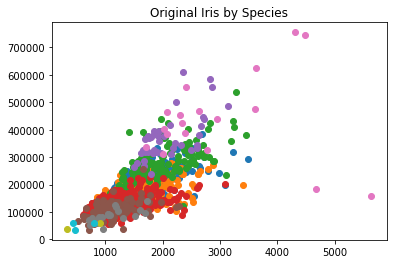

In [43]:
hp2 = pd.read_csv('train.csv')
hp2=hp2[['OverallQual','GrLivArea','SalePrice']]

from matplotlib import pyplot as plt
# k is the input parameter set to the number of species
k = len(hp2['OverallQual'].unique())
for i in hp2['OverallQual'].unique():
    # select only the applicable rows
    ds = hp2[hp2['OverallQual'] == i]
    # plot the points
    plt.plot(ds[['GrLivArea']],ds[['SalePrice']],'o')
plt.title("Original Iris by Species")
plt.show()



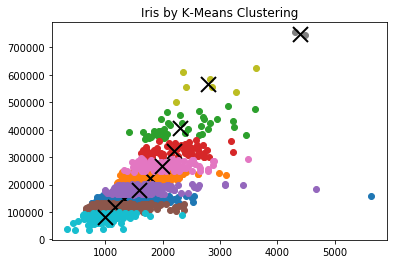

In [44]:
from sklearn import cluster
del hp2['OverallQual']
kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300, algorithm='auto')
kmeans.fit(hp2)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations from the applicable cluster
    ds = hp2.iloc[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds['GrLivArea'],ds['SalePrice'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.title("Iris by K-Means Clustering")
plt.show()

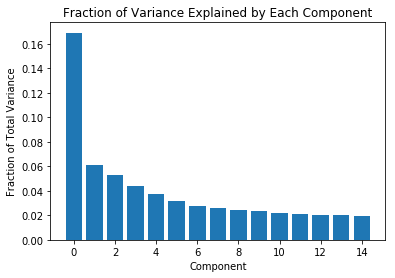

In [34]:
from sklearn.decomposition import PCA
# perform PCA
pca = PCA(n_components=15).fit(hp)

# plot fraction of variance explained by each component
pca.explained_variance_ratio_
x = np.arange(15)
plt.bar(x, pca.explained_variance_ratio_)
plt.title('Fraction of Variance Explained by Each Component')
plt.xlabel('Component')
plt.ylabel('Fraction of Total Variance')
plt.show()